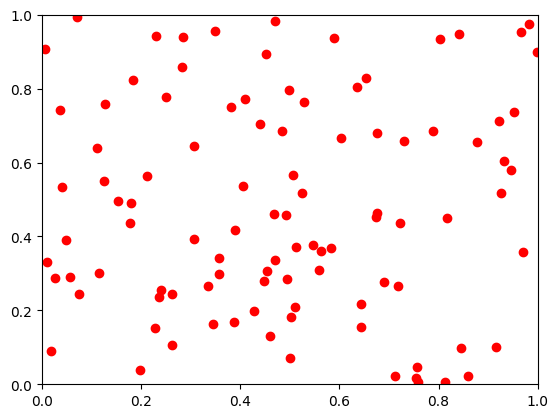

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Placeholder data for the spots' coordinates
# In reality, this would be replaced by the actual coordinates of the spots
num_spots = 100
initial_positions = np.random.rand(num_spots, 2)
intermediate_positions = np.random.rand(num_spots, 2)
final_positions = np.random.rand(num_spots, 2)

# Initialize figure and axes
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Create a scatter plot
spots = ax.scatter(initial_positions[:, 0], initial_positions[:, 1], c="blue")

# Transition times and pause durations in frames (assuming 30 fps)
transition_frames = 120  # 4 seconds
pause_frames = 30  # 1 second
total_frames = transition_frames * 2 + pause_frames * 3


# Define the update function
def update(frame):
    if frame < transition_frames:  # Transition to intermediate
        alpha = frame / transition_frames
        new_positions = (1 - alpha) * initial_positions + alpha * intermediate_positions
    elif frame < transition_frames + pause_frames:  # Pause at intermediate
        new_positions = intermediate_positions
    elif frame < 2 * transition_frames + pause_frames:  # Transition to final
        alpha = (frame - transition_frames - pause_frames) / transition_frames
        new_positions = (1 - alpha) * intermediate_positions + alpha * final_positions
    else:  # Pause at final
        new_positions = final_positions

    # Update the spots' positions
    spots.set_offsets(new_positions)

    # Pulsating highlights
    if frame % pause_frames < pause_frames / 2:
        color = "red"
    else:
        color = "blue"
    spots.set_color(color)

    return (spots,)


# Create the animation
ani = FuncAnimation(fig, update, frames=total_frames, interval=33, blit=True)

# Display the animation
plt.show()

In [2]:
ani